In [2]:
import sys
sys.path.insert(0, '../code')

In [3]:
import csv
import numpy as np
import pandas as pd
from custom_model import Net_2
from train_custom import evaluate
from test_dataset import TestDataset
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

/home/diego/miniconda3/envs/HoMLChallenge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from predict import load_model_effnet, load_model_scratch

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # automatically select on what device to run the code


In [6]:
model = load_model_scratch()

In [7]:
model = model.to(device)

In [8]:
from train_custom import valid_data, valid_set

In [9]:
with torch.no_grad():
    X, y = valid_set[0]
    X = X.to(device).float()
    features = model.features(X.unsqueeze(0))

In [10]:
features = features[0].cpu().numpy()

In [11]:
features = features/features.max()

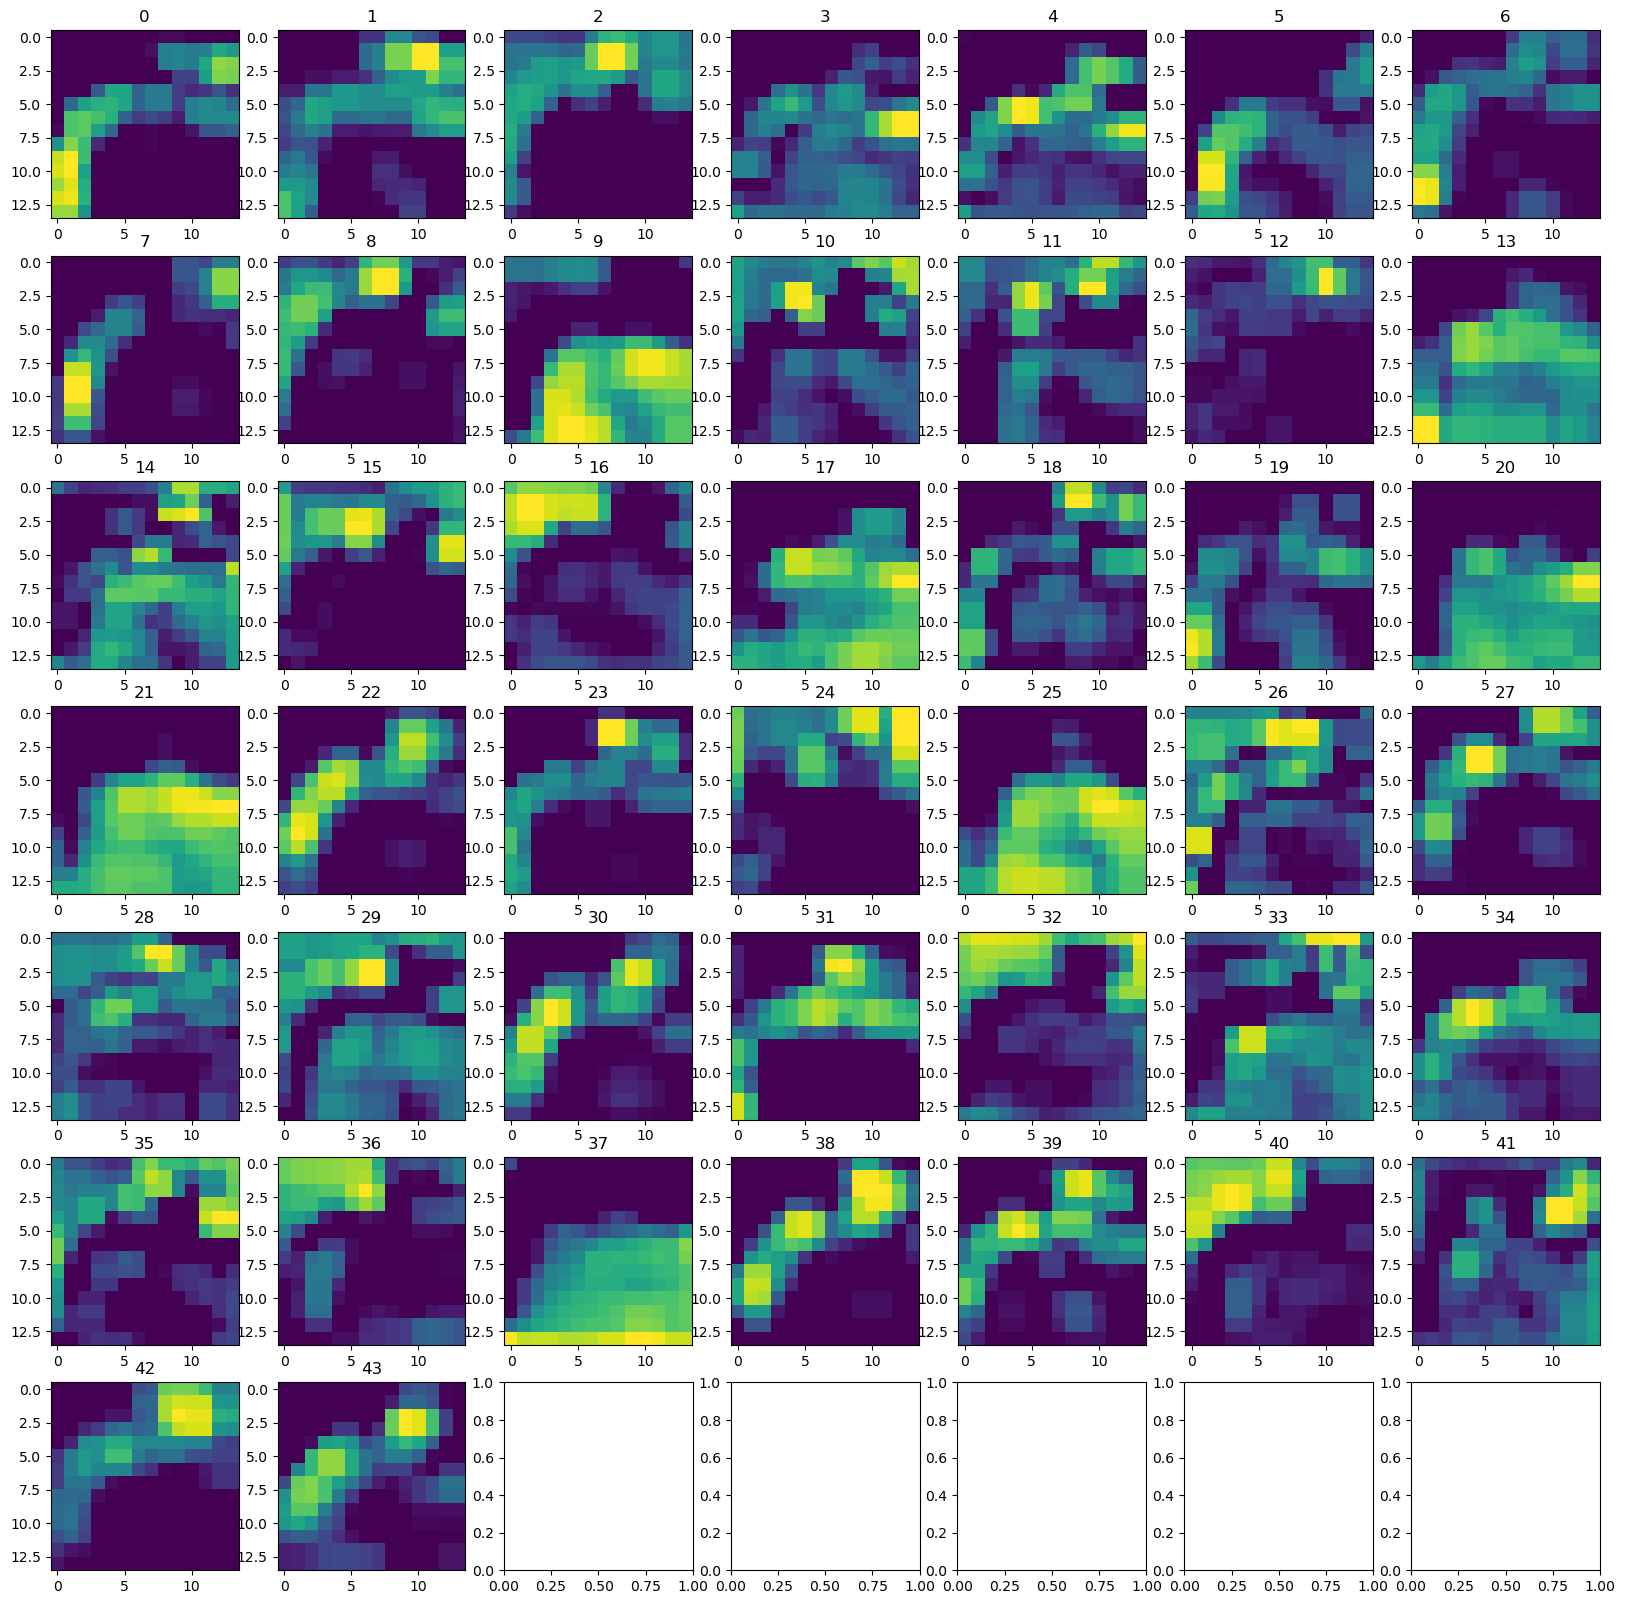

In [12]:
fig, axes = plt.subplots(7, 7, figsize=(20,20))
for n, (feature_map, ax) in enumerate(zip(features, axes.flatten())):
    ax.imshow(feature_map)
    ax.set_title(str(n))

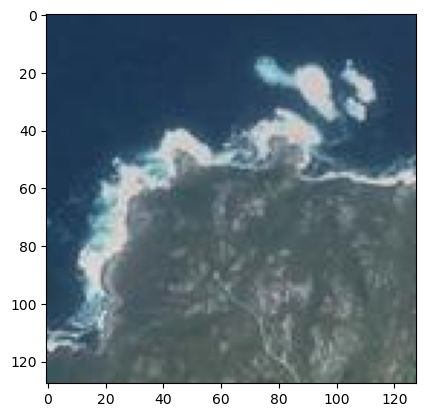

In [13]:
plt.imshow(X.cpu().numpy().transpose(1,2,0))